## Given a set of text movie reviews that have been labeled negative or positive

### Data pre-processing

Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('../data/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


Check for missing values

In [2]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [3]:
df = df.dropna()
df.isnull().sum()

label     0
review    0
dtype: int64

Check for blank strings

In [4]:
df['review'].str.isspace().sum()

np.int64(27)

In [5]:
df = df[~df['review'].str.isspace()]
df['review'].str.isspace().sum()

np.int64(0)

### Model

Train model

In [6]:
X = df['review']
y = df['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

Create a pipeline by using LinearSVC

In [9]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [11]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def report(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_predictions(y_test, preds)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



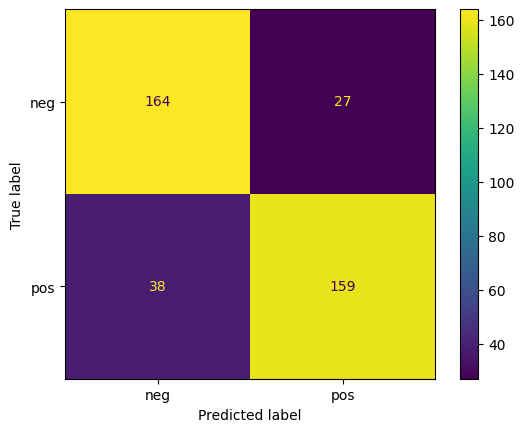

In [12]:
report(pipe)

Create a pipeline by using Naive Bayes

In [13]:
naive_bayes_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



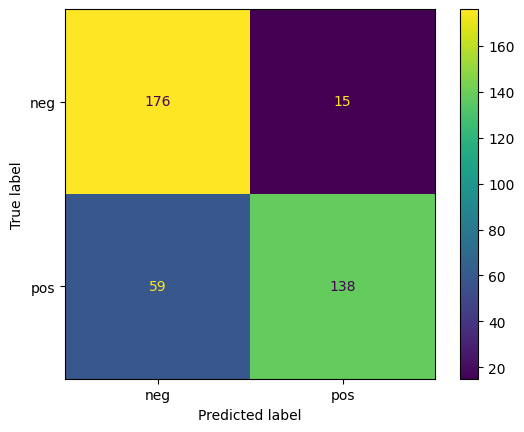

In [14]:
report(naive_bayes_pipe)